### Exercise 4 

Read in the iris dataset using pandas and use only the SepalLengthCm and SepalWidthCm columns. Use the elbow method to determine an appropriate number of clusters. Use the K-means clustering algorithm. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df.iloc[:, [1, 2]].values

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
import ipywidgets as widgets
from ipywidgets import interact

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

C:\Users\44784\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


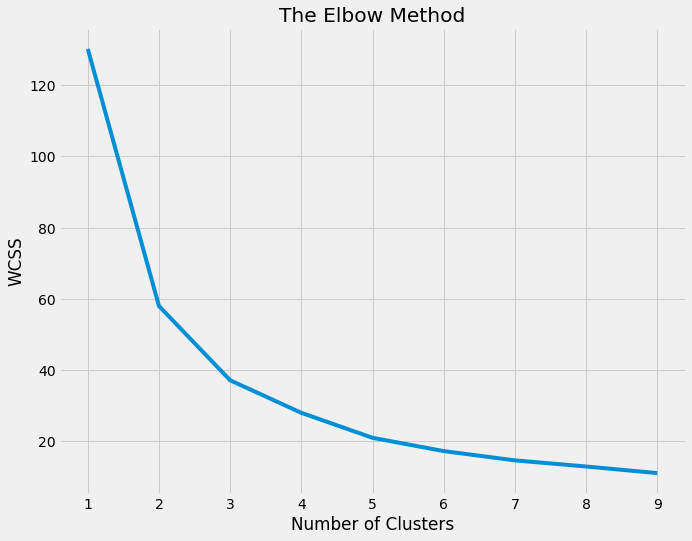

In [7]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 10):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(X)
    WCSS.append(clf.inertia_)
plt.plot(range(1, 10), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

Not much change after 3 clusters so use 3 in the k means algorithm.

In [8]:
clf = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf.fit_predict(X)

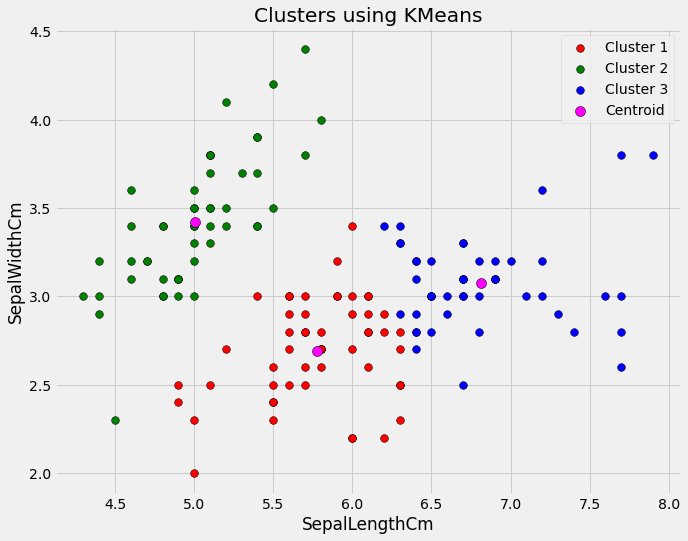

In [9]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
# cluster centres
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clusters using KMeans')
plt.ylabel('SepalWidthCm')
plt.xlabel('SepalLengthCm')
plt.show()